In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## 1. The Train Dataset

#### Importing the app_train dataset to a data frame
#### Displaying a sample of the dataframe

In [2]:
appTrain= pd.read_csv("application_train.csv")

appTrain.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Checking shape

In [3]:
print(appTrain.shape)

(307511, 122)


#### Checking Datatype of Train data

In [4]:
appTrain.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

#### Checking count of target variable

In [5]:
appTrain['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

## Conclusion based on the above evaluation:

#### Above evaluation shows that the application_train dataset has 307511 rows and 122 columns in total. This means that there are 307511 instances of separate loans distributed based on which our analytics is expected. Also as seen in the sample above there are 122 columns in total including the second column 'Target'(dependent variable)

#### Also we can see that the datset is combination of numerical and categorical variables and the dataset has some missing values being shown as NaN

## 2.The Test Dataset

#### Importing the app_test dataset to a data frame
#### displaying a sample of the dataframe

In [6]:
appTest= pd.read_csv("application_test.csv")

appTest.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking shape

In [7]:
appTest.shape

(48744, 121)

# Conclusion based on the above evaluation:

#### Above evaluation shows that the application_test dataset has 48744 rows and 121 columns in total. This means that there are 48744 instances of separate loans distributed. Also as seen in the sample above there are 121 columns in total (which basically is the same as 122 columns of appTrain- 1 column(the traget Column))

#### Also we can see that the datset is combination of numerical and categorical variables and the dataset has some missing values being shown as NaN

## 3. The next key analysis is to check out and analyse the Target Variable
#### This will let us decide the type of target variable, classes if any, number of classes and the overall distribution of the dependent variable

In [8]:
appTrain.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

#### The above analysis shows that the target is a numerical variable.

## 4. Obtaining y and X parameter for test train model where  y contains values for column TARGET and X contains all columns except TARGET

In [9]:
y= appTrain['TARGET']

In [10]:
X= appTrain.drop('TARGET', axis=1)

### Performing split on Train data to obtain Test Data.

In [11]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = (15000/appTrain.shape[0]), stratify = y, random_state = 50)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = (60000/appTrain.shape[0]), stratify = y, random_state = 50)

In [12]:
#Now we will proceed using X_train and y_train as our dataset
# we will keep X_test and y_test for tesing our models accuracy towards the end ## Unseen data

appTrain= pd.concat ([X_train, y_train], axis=1)
appTrain.shape

(247511, 122)

### This means that the test dataframe has 307511- 247511 rows and 122 columns including the TARGET column

In [13]:
#Majority class classifier count
target_counts=appTrain['TARGET'].value_counts()
target_percent=target_counts/target_counts.sum()*100

#pd.concat(target_counts,target_percent)
print("percentage of rows having target as 0 (i.e. customer repaid): ",target_percent[0])

#print("*******\n")
print("percentage of rows having target as 1 (i.e. customer didnt repay):   ",target_percent[1])
#print(target_counts)

percentage of rows having target as 0 (i.e. customer repaid):  91.92722747675862
percentage of rows having target as 1 (i.e. customer didnt repay):    8.07277252324139


#### The above analysis clearly showcases that this is a (hugely) imbalanced classification problem as almost 92% of the loans were paid back compared to the 8% of non-repayment instances.

In [14]:
appTrain[appTrain["TARGET"]==0].shape

(227530, 122)

In [15]:
appTrain[appTrain["TARGET"]==1].shape

(19981, 122)

In [16]:
#Balancing the given dataframe by pulling out equal number of rows 
#that have target as 1 and target as 0

balanceddf = pd.concat((appTrain[appTrain["TARGET"]==1], \
                        appTrain[appTrain["TARGET"]==0]. 
                        sample(n=int(appTrain[appTrain["TARGET"]==1].shape[0]*(60/40)))))
balanceddf.shape

(49952, 122)

In [17]:
appTrain= balanceddf

In [18]:
#Majority class classifier count
target_counts=appTrain['TARGET'].value_counts()
target_percent=target_counts/target_counts.sum()*100

#pd.concat(target_counts,target_percent)
print("percentage of rows having target as 0 (i.e. customer repaid): ",target_percent[0])

#print("*******\n")
print("percentage of rows having target as 1 (i.e. customer didnt repay):   ",target_percent[1])
#print(target_counts)

percentage of rows having target as 0 (i.e. customer repaid):  59.999599615631006
percentage of rows having target as 1 (i.e. customer didnt repay):    40.000400384368994


In [19]:
#Lets check the unique values in the Target column
np.unique(appTrain[['TARGET']])

array([0, 1], dtype=int64)

#### Above analysis shows that there are 2 unique classes of data in the Target column. This means that our analysis will be pivoted around 2 class classification.

In [20]:
appTrain['TARGET'].value_counts()

0    29971
1    19981
Name: TARGET, dtype: int64

#### Above analysis shows that now the data looks ok to work (across the 2 classes in the context)

## 5.Let's analyse the column types from our dataset

In [21]:
appTrain.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
TARGET                          int64
Length: 122, dtype: object

The above output does not help us much in the current format. lets take a count of the columns based on their datatype

In [22]:
appTrain.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

#### So we have 65 columns of the type float64, 41 columns of the type int64 and 16 columns of the type object. This info did not help us much again.  However, we have an idea of Object type variables(categorical) seen as 16 here. 
#### Similarly lets check the test dataset

In [23]:
appTest.shape

(48744, 121)

In [24]:
appTest.dtypes.value_counts()

float64    62
int64      43
object     16
dtype: int64

In [25]:
X_test.shape

(60000, 121)

In [26]:
X_test.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64


#### Lets take care of these categorical variables in a way that they become computable to help us predict our Target variable.

### 7.For this task, we will be using One Hot Encoding(OHE hereafter) using the get_dummies function of the pandas

In [27]:
#implementing One Hot Encoding on train and test data for the 16 object type variables

appTrainOHE= pd.get_dummies(appTrain)
appTestOHE= pd.get_dummies(appTest)
X_testOHE= pd.get_dummies(X_test)


# Now Lets check whether the number of columns increased due to One Hot Encoding
print('After OHE the training Features shape: ', appTrainOHE.shape)
print('After OHE the testing Features shape: ', appTestOHE.shape)
print('After OHE the testing Features shape extracted from apptrain.csv : ', X_testOHE.shape)

After OHE the training Features shape:  (49952, 244)
After OHE the testing Features shape:  (48744, 242)
After OHE the testing Features shape extracted from apptrain.csv :  (60000, 244)


#### The difference that we see here in the count of columns between the train and test data is because: Some of the categorical variables in the train data had categories that didnt show up in the test data. So there were greater number of columns created by OHE for train data.

#### However, for the analysis that we are trying to achieve the number of columns in the train and test data must be in sync and therefore align. we will be achieving this using the the pandas align() method.



In [28]:
# for implementing align() lets save the Target variable from the train data-set as the test data-set does not have it and because of which it will get dropped during alignment

# lets extract that in a separate label variable

trainingTarget= appTrainOHE['TARGET']


#aliging dataframes to retain only those columns that are present in both of the dataframes

appTrainOHE, appTestOHE= appTrainOHE.align(appTestOHE, join= 'inner', axis=1)
print('After aligning the training Features shape: ', appTrainOHE.shape)
print('After aligning the testing Features shape: ', appTestOHE.shape)

#appTrainOHE, X_testOHE= appTrainOHE.align(X_testOHE, join= 'inner', axis=1)


print('After aligning the training Features (with X_test) shape: ', appTrainOHE.shape)
print('After aligning the testing Features shape: ', appTestOHE.shape)
print('After aligning the testing Features shape of test data extracted from apptrain.csv: ', X_testOHE.shape)

After aligning the training Features shape:  (49952, 241)
After aligning the testing Features shape:  (48744, 241)
After aligning the training Features (with X_test) shape:  (49952, 241)
After aligning the testing Features shape:  (48744, 241)
After aligning the testing Features shape of test data extracted from apptrain.csv:  (60000, 244)


#### As shown above the training and test data set, both have equal number of features now. However during the alignment we lost our 'Target' variable. We will now add it back to the training data as shown below.

In [29]:
appTrainOHE['TARGET']= trainingTarget

In [30]:
#rechecking shape of the train data
appTrainOHE.shape

(49952, 242)

### 8. We will now try to underrstand the relation between the independent varaibles and the target variable by using the Pearson Correlation Coefficient calculator using the corr() method. Please note that correlation does not indicate causality but are a significant measure to understand the relationships between the features and label.

In [31]:
correlations = appTrainOHE.corr()['TARGET'].sort_values(ascending= False)

In [32]:
#checking the top 20 correlation values

correlations.head(20)

TARGET                                               1.000000
DAYS_BIRTH                                           0.143076
REGION_RATING_CLIENT_W_CITY                          0.110899
REGION_RATING_CLIENT                                 0.107615
NAME_INCOME_TYPE_Working                             0.103247
DAYS_LAST_PHONE_CHANGE                               0.099170
CODE_GENDER_M                                        0.096785
REG_CITY_NOT_WORK_CITY                               0.094753
DAYS_ID_PUBLISH                                      0.093571
NAME_EDUCATION_TYPE_Secondary / secondary special    0.093468
FLAG_EMP_PHONE                                       0.087250
REG_CITY_NOT_LIVE_CITY                               0.080393
DAYS_REGISTRATION                                    0.079575
OCCUPATION_TYPE_Laborers                             0.079191
FLAG_DOCUMENT_3                                      0.077202
OWN_CAR_AGE                                          0.076938
LIVE_CIT

In [33]:
#checking the bottom 20 correlation values

correlations.tail(20)

TOTALAREA_MODE                         -0.070469
ELEVATORS_MEDI                         -0.073590
ELEVATORS_AVG                          -0.074381
REGION_POPULATION_RELATIVE             -0.074848
AMT_GOODS_PRICE                        -0.075562
HOUSETYPE_MODE_block of flats          -0.075653
EMERGENCYSTATE_MODE_No                 -0.079342
DAYS_EMPLOYED                          -0.085294
ORGANIZATION_TYPE_XNA                  -0.087241
NAME_INCOME_TYPE_Pensioner             -0.087792
FLOORSMAX_MODE                         -0.090103
FLOORSMAX_MEDI                         -0.091331
FLOORSMAX_AVG                          -0.091865
CODE_GENDER_F                          -0.096785
NAME_EDUCATION_TYPE_Higher education   -0.107872
EXT_SOURCE_2                           -0.273251
EXT_SOURCE_1                           -0.283242
EXT_SOURCE_3                           -0.306343
FLAG_MOBIL                                   NaN
FLAG_DOCUMENT_12                             NaN
Name: TARGET, dtype:

#### Showcasing one of the key engineering techniques before building models: feature engineering
#### For this assignment, we will be limiting our approach to a few of the key columns identified based on the correlation values

In [34]:
# lets make a new dataframe for the features which will be utilised to form a polynomial as part of feature engineering
pFeaturesTrain= appTrainOHE[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]

#lets keep the Target feature aside for now(it will be used later) and drop the Target column
pTargetTrain= pFeaturesTrain['TARGET']
pFeaturesTrain = pFeaturesTrain.drop(columns = ['TARGET'])


#Similarly for test data
pFeaturesTest= appTestOHE[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]


#For the missing values in both train and test dataset lets use the median of the values to impute
# we will use the sklearn's SimpleImputer utility for this
from sklearn.impute import SimpleImputer



#creating an instance of the SimpleImputer to be used based on the median value
sklImputerMedian = SimpleImputer(missing_values=np.nan, strategy='median')


In [35]:
#Lets impute the missing values now
pFeaturesTrain = sklImputerMedian.fit_transform(pFeaturesTrain) #fitting the median only on training data
pFeaturesTest = sklImputerMedian.transform(pFeaturesTest) #using the same median (as fitted on training data) on the test data as well


In [36]:
# Now creating the polynomial object with a degree of 3: Actual Feature Engineering step
#using PolynomialFeatures utility from the sklearn library 

from sklearn.preprocessing import PolynomialFeatures

#instantiating the PolynomialFeatures class with a degree of 3 which will be used for actual feature transformation
pObject= PolynomialFeatures(degree = 3)

In [37]:
#now, we need to fit the training features  'pFeaturesTrain' before transforming the train and test features as a polynomial combo

pObject.fit(pFeaturesTrain)

#transforming the train and test polynomial features using the fitted object above:

pFeaturesTrain = pObject.transform(pFeaturesTrain)
pFeaturesTest = pObject.transform(pFeaturesTest)
print('Polynomial Features shape for train: ', pFeaturesTrain.shape)
print('Polynomial Features shape for test: ', pFeaturesTest.shape)

Polynomial Features shape for train:  (49952, 35)
Polynomial Features shape for test:  (48744, 35)


#### As seen above, there were 35 new features created out of 4 variables from our dataset based on various comination of interactions. We will need to run a recheck on these newly created features to identify their correaltion with the target variable.

In [38]:
#First we will need to create a new dataframe of the features

pFeaturesTrain = pd.DataFrame(pFeaturesTrain, 
                             columns = pObject.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))


#We will then be appending the target column that we saved earlier as pTargetTrain

pFeaturesTrain['TARGET'] = pTargetTrain

In [39]:
# Now lets calculate the correlation of the newly created polynomial features with the target

pCorrelations = pFeaturesTrain.corr()['TARGET'].sort_values(ascending= False)

In [40]:
# showing top 10 positive and negative correlations
print(pCorrelations.head(10))
print(pCorrelations.tail(10))

TARGET                                    1.000000
EXT_SOURCE_3^2                            0.021928
EXT_SOURCE_3                              0.021370
EXT_SOURCE_3^3                            0.021339
EXT_SOURCE_1 EXT_SOURCE_3^2               0.018879
EXT_SOURCE_1 EXT_SOURCE_3                 0.013934
EXT_SOURCE_2 EXT_SOURCE_3^2               0.013521
EXT_SOURCE_2 EXT_SOURCE_3                 0.010044
EXT_SOURCE_3 DAYS_BIRTH^2                 0.009688
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3    0.008569
Name: TARGET, dtype: float64
EXT_SOURCE_2^3                         -0.004234
EXT_SOURCE_1                           -0.005533
EXT_SOURCE_1 DAYS_BIRTH^2              -0.006411
EXT_SOURCE_1^2                         -0.006465
EXT_SOURCE_1^3                         -0.006831
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH   -0.006885
EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH   -0.008440
EXT_SOURCE_3 DAYS_BIRTH                -0.013670
EXT_SOURCE_3^2 DAYS_BIRTH              -0.016576
1                   

#### As seen above many of the newly created features abvoe have a greater correlation with the TARGET than the original features. However this does not mean that keep these features in our original dataset going to impact our final predictions in the expected way. Therefore we will try to keep a separate dataframe of train and test data with these features and will compare the difference of dataset with and without Feature engineering later.

#### For now lets append these newly founded features to a copy of the original dataset

In [41]:
#merge the newly created features dataframe witha copy of original training dataframe
pFeaturesTrain['SK_ID_CURR'] = appTrainOHE['SK_ID_CURR']
appTrainWithP= appTrainOHE.merge(pFeaturesTrain, on = 'SK_ID_CURR', how = 'left')
print(appTrainWithP.shape)

#creating a dataframe of the polynomial features for test data-set 
pFeaturesTest = pd.DataFrame(pFeaturesTest, columns = pObject.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# now merging the newly created poly features dataframe (from test data) with a copy of original test dataframe

pFeaturesTest['SK_ID_CURR'] = appTestOHE['SK_ID_CURR']
appTestWithP = appTestOHE.merge(pFeaturesTest, on = 'SK_ID_CURR', how = 'left')

print(appTestWithP.shape)
#Once again we need to align the 2 dataframes created here

appTrainWithP, appTestWithP = appTrainWithP.align(appTestWithP, join = 'inner', axis = 1)

(49952, 278)
(48744, 276)


In [42]:
appTrainOHE.shape

(49952, 242)

Now lets recheck if our newly created datframes with original train and test data merged with respective polynomial features has the same count of features

In [43]:
print(' Shape of training data with polynomial features: ', appTrainWithP.shape)
print('Shape of test data with polynomial features:  ', appTestWithP.shape)

 Shape of training data with polynomial features:  (49952, 276)
Shape of test data with polynomial features:   (48744, 276)


### 8.Creating a new feature calculated based on an existing feature

In [44]:
#creating a copy of train and test data
app_train_calcFeature = appTrainOHE.copy()
app_test_calcFeature = appTestOHE.copy()


In [45]:
app_train_calcFeature['DAYS_EMPLOYED_PERCENT'] = app_train_calcFeature['DAYS_EMPLOYED'] / app_train_calcFeature['DAYS_BIRTH']

In [46]:
app_test_calcFeature['DAYS_EMPLOYED_PERCENT'] = app_test_calcFeature['DAYS_EMPLOYED'] / app_test_calcFeature['DAYS_BIRTH']

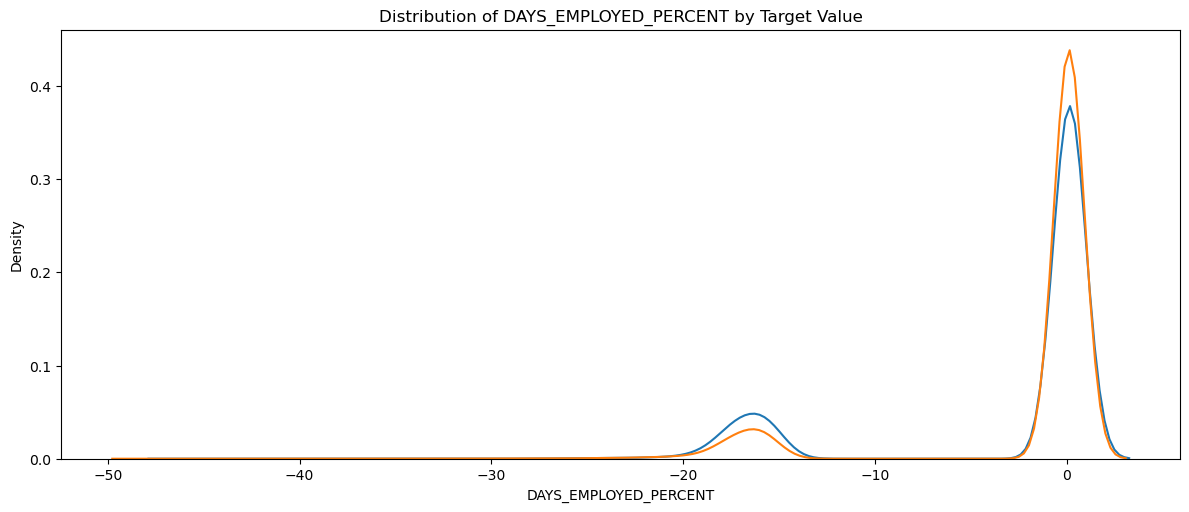

In [47]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_calcFeature.loc[app_train_calcFeature['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_calcFeature.loc[app_train_calcFeature['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

#### Based on the graph here, nothing siginifcant can be deduced. Lets wait and watch,

#### As we have already processed the categorical variables using one hot encoding, we will now use all of the features to create our model. However, we still need to preprocess our data in terms of filling in the missing values(imputation) for the features and also normalizing the numerical features(i.e. feature scaling)

In [48]:
# pulling out the label from the training data
if 'TARGET' in appTrainOHE:
    X_train = appTrainOHE.drop(columns = ['TARGET'])
else:
    X_train = appTrainOHE.copy()
    

# creating a list of Feature names
features = list(X_train.columns)

# creating copy of the test data
X_test_fromTrain = appTestOHE.copy()

X_test=X_testOHE.copy()

In [49]:
# Median imputation of missing values
#For imputing, we will once again use the sklearn's SimpleImputer utility for this
from sklearn.impute import SimpleImputer

#creating instance of SimpleImputer
simpleImputer = SimpleImputer(strategy = 'median')


# Fit on the training data
simpleImputer.fit(X_train)

# Transform both training and testing data
X_train = simpleImputer.transform(X_train)
X_test_fromTrain = simpleImputer.transform(X_test_fromTrain) ###Searchme1
#X_test= simpleImputer.transform(X_test)

# for scaling each of the numerical features to 0-1
#importing MinMaxScaler from sklearn:
from sklearn.preprocessing import MinMaxScaler
#creating instance of MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))



# Repeat with the scaler
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test_fromTrain = scaler.transform(X_test_fromTrain)###Searchme1
#X_test= scaler.transform(X_test)

print('Training data shape: ', X_train.shape)
print('Test data shape: ', X_test_fromTrain.shape)
print("test data from appTrain.csv: ", X_test.shape)

Training data shape:  (49952, 241)
Test data shape:  (48744, 241)
test data from appTrain.csv:  (60000, 244)
